# Student data

This data analyzes pass/fail data for a class


In [5]:
data = [60,40,90,87,45,12,99,100,67,66]
print(data)

[60, 40, 90, 87, 45, 12, 99, 100, 67, 66]


In [6]:
import numpy as np
grades = [60,40,90,87,45,12,99,100,67,66]
print(grades)

[60, 40, 90, 87, 45, 12, 99, 100, 67, 66]


In [7]:
import pandas as pd;
students_df = pd.read_csv('students-performances.csv')
students_df.head()

,name,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Anderson Matthew,female,group B,bachelor's degree,standard,none,72,72,74
1,Anderson Carter,female,group C,some college,standard,completed,69,90,88
2,Gonzalez Avery,female,group B,master's degree,standard,none,90,95,93
3,Mitchell Charlotte,male,group A,associate's degree,free/reduced,none,47,57,44
4,Nguyen Avery,male,group C,some college,standard,none,76,78,75


In [8]:
students_df = students_df.dropna(axis=0)

Get Average Math/Reading/Writing Scores


In [9]:

mathAverageScore = students_df['math score'].mean()
readingAverageScore = students_df['reading score'].mean()
writingAverageScore = students_df['writing score'].mean()

print('Math score mean:', mathAverageScore)
print('Reading score mean:', readingAverageScore)
print('Writing score mean:', writingAverageScore)

Math score mean: 66.089
Reading score mean: 69.169
Writing score mean: 68.054


Get number of students who passed the minimum score of 60


In [10]:
totalStudents = students_df.shape[0]
minimumPassingScore = 60

nPassedMath = students_df[students_df['math score'] >= minimumPassingScore].shape[0]
nPassedReading = students_df[students_df['reading score'] >= minimumPassingScore].shape[0]
nPassedWriting = students_df[students_df['writing score'] >= minimumPassingScore].shape[0]

print('Number of students passed Math:', nPassedMath, 'outof', totalStudents)
print('Number of students passed Reading:', nPassedReading, 'outof', totalStudents)
print('Number of students passed Writing:', nPassedWriting, 'outof', totalStudents)

Number of students passed Math: 677 outof 1000
Number of students passed Reading: 746 outof 1000
Number of students passed Writing: 719 outof 1000


Filter only students passed math


In [11]:
passedStudents = students_df[students_df['math score'] >= minimumPassingScore]
print(passedStudents)

                 name  gender race/ethnicity parental level of education  \
0    Anderson Matthew  female        group B           bachelor's degree   
1     Anderson Carter  female        group C                some college   
2      Gonzalez Avery  female        group B             master's degree   
4        Nguyen Avery    male        group C                some college   
5      Martinez Mason  female        group B          associate's degree   
..                ...     ...            ...                         ...   
994     Nguyen Harper    male        group A                 high school   
995     Mitchell Liam  female        group E             master's degree   
996       Hill Samuel    male        group C                 high school   
998    Lewis Benjamin  female        group D                some college   
999      Martin Isaac  female        group D                some college   

            lunch test preparation course  math score  reading score  \
0        standa

Avarage of students passed math


In [12]:
passedStudents = students_df[students_df['math score'] >= minimumPassingScore]['math score'].mean()
print(passedStudents)

74.16691285081241


Add new column 'Passed' to table


In [13]:
students_df['Passed'] = (students_df['math score'] >= minimumPassingScore) & (students_df['reading score'] >= minimumPassingScore) & (students_df['writing score'] >= minimumPassingScore)
totalPassed = students_df[students_df['Passed'] == True].shape[0]
print('Total students passed all subjects:', totalPassed)

Total students passed all subjects: 603


Get top 20 students by math score


In [14]:
topMathStudents = students_df.sort_values(by='math score', ascending=False).head(20)


Make bar chart for top 20 math high scoring students


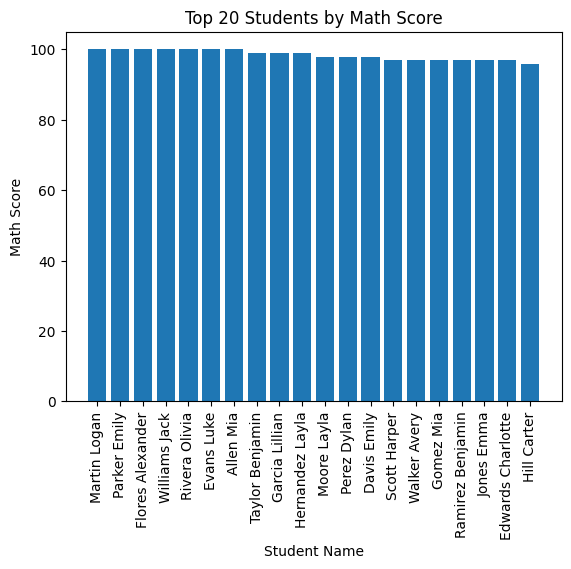

In [24]:
import matplotlib.pyplot as plt

plt.bar(x=topMathStudents.name, height=topMathStudents['math score'], orientation='vertical')
plt.ylabel('Math Score')
plt.xlabel('Student Name')
plt.title('Top 20 Students by Math Score')
plt.xticks(rotation=90)
plt.show()